#Souvik Ganguly -> Iris flower classification 

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
dataset=pd.read_csv('/content/Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [188]:
dataset=dataset.drop(['Id'],axis=1)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [189]:
lb=LabelEncoder()
dataset['Species']=lb.fit_transform(dataset['Species'])
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [190]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [191]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [192]:
x.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [193]:
y.head(2)

0    0
1    0
Name: Species, dtype: int64

In [194]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=14)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [195]:
x_train.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,105.000000,105.000000,105.000000,105.000000
mean,5.940000,3.037143,3.947619,1.283810
std,0.864091,0.401501,1.780617,0.776348
min,4.300000,2.000000,1.100000,0.100000
25%,5.200000,2.800000,1.600000,0.400000
50%,6.000000,3.000000,4.500000,1.400000
75%,6.500000,3.200000,5.200000,1.900000
max,7.900000,4.200000,6.900000,2.500000


In [196]:
x_train.cov()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.746654,-0.014288,1.372981,0.554885
SepalWidthCm,-0.014288,0.161203,-0.214382,-0.074104
PetalLengthCm,1.372981,-0.214382,3.170595,1.326740
PetalWidthCm,0.554885,-0.074104,1.326740,0.602716


In [197]:
x_train.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.041185,0.892348,0.827154
SepalWidthCm,-0.041185,1.000000,-0.299868,-0.237739
PetalLengthCm,0.892348,-0.299868,1.000000,0.959752
PetalWidthCm,0.827154,-0.237739,0.959752,1.000000


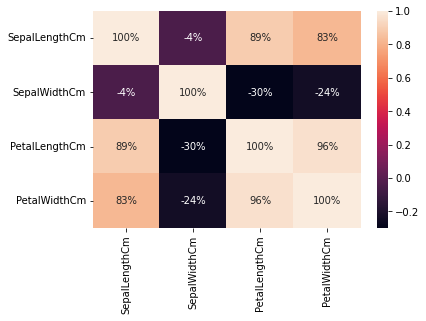

In [198]:
sns.heatmap(x_train.corr(),annot=True,fmt='.0%')

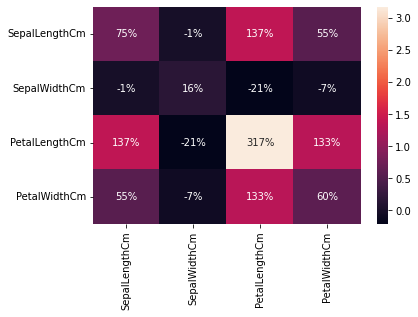

In [199]:
sns.heatmap(x_train.cov(),annot=True,fmt='.0%')

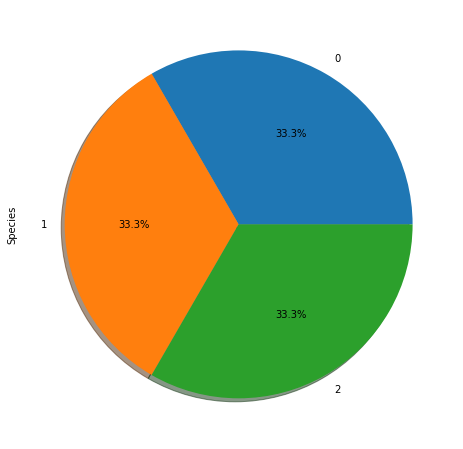

In [200]:
plt.figure(figsize=(10,8))
dataset['Species'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

Text(0, 0.5, 'values')

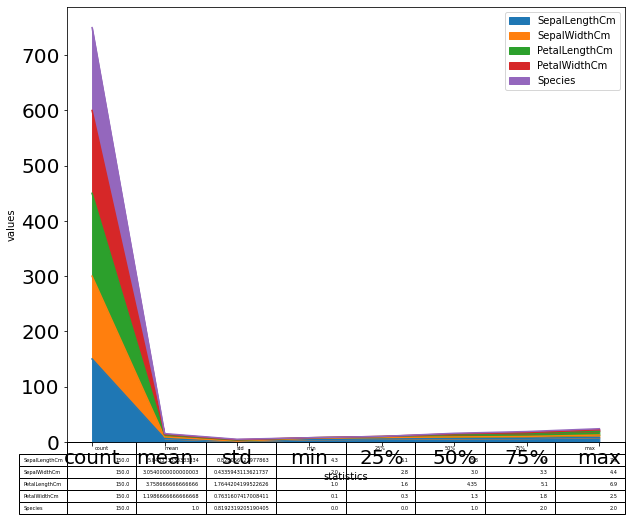

In [201]:
dataset.describe().plot(kind='area',fontsize=20,figsize=(10,8),table=True,stacked=True)
plt.xlabel("statistics")
plt.ylabel("values")

In [202]:
from sklearn import tree 
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
prediction=dtree.predict(x_test)
prediction

array([0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0,
       0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 2, 0, 0, 1,
       2])

In [203]:
acc_score=metrics.accuracy_score(y_test,prediction)
print("Accuracy score : ",acc_score*100)

Accuracy score :  95.55555555555556


In [204]:
c_f=metrics.confusion_matrix(y_test,prediction)
print(c_f)

[[19  0  0]
 [ 0 15  0]
 [ 0  2  9]]


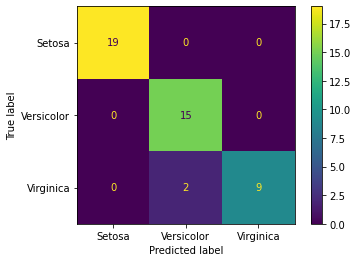

In [205]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_f, display_labels = ['Setosa', 'Versicolor',
                                                                                      'Virginica'])
cm_display.plot()

In [206]:
import sys
def pso(particles,iterations,dimensions,inertia):
  max_d=40
  min_d=10
  max_f=1e-5
  min_f=1e-8
  max_id=1e-4
  min_id=1e-1
  max_l=0.5
  min_l=0.1
  x=np.random.rand(particles,1)*(max_d - min_d)+min_d
  y=np.random.rand(particles,1)*(max_f - min_f)+min_f
  z=np.random.rand(particles,1)*(max_id - min_id)+min_id
  q=np.random.rand(particles,1)*(max_l - min_l)+min_l
  c=np.concatenate((x,y,z,q),axis=1)
  v=np.zeros((particles,dimensions))
  c1=2
  c2=2
  p_best=np.zeros((particles,dimensions))
  p_best_val=np.zeros(particles)+sys.maxsize
  g_best=np.zeros(dimensions)
  g_best_val=sys.maxsize
  best_iter=np.zeros(iterations)
  p_best_RGS=np.empty((particles),dtype=object)
  g_best_RGS=sys.maxsize
  #plot(c)
  from sklearn.metrics import mean_squared_error
  for i in range(iterations):
    for j in range(particles):
      rgs=DecisionTreeClassifier(max_depth=c[j][0],max_features=c[j][1],min_impurity_decrease=c[j][2],
                                     min_samples_leaf=c[j][3])
      rgs.fit(x_train,y_train)
      y_predict=rgs.predict(x_test)
      mse=mean_squared_error(y_test,y_predict)

      if(mse<p_best_val[j]):
        p_best_val[j]=mse
        p_best_RGS[j]=rgs
        p_best[j]=c[j].copy()

      aux=np.argmin(p_best_val)
      if(p_best_val[aux] < g_best_val):
        g_best_val=p_best_val[aux]
        g_best=p_best[aux].copy()
        g_best_RGS=p_best_RGS[aux]

      rand1=np.random.random()
      rand2=np.random.random()

      w=inertia
      
      v[j]=w*v[j]+c1*(p_best[j]-c[j])*rand1+c2*(g_best-c[j])*rand2
      c[j]=c[j]+v[j]

      if(c[j][3] <min_l):
        c[j][3]=min_l
      if(c[j][3] >max_l):
        c[j][3]=max_l
      if(c[j][2] <min_id):
        c[j][2]=min_id
      if(c[j][2] >max_id):
        c[j][2]=max_id
      if(c[j][1]<min_f):
        c[j][1]=min_f
      if(c[j][1]>max_f):
        c[j][1]=max_f
      if(c[j][0]<min_d):
        c[j][0]=min_d
      if(c[j][0]>max_d):
        c[j][0]=max_d
      
    best_iter[i]=g_best_val

    print('best value iteration %d = %f\n' %(i,g_best_val))

  print('group best configuration found')
  print(g_best)
  print('\n')
  print('best regressor \n')
  print(g_best_RGS)
  print('\n')

  t=range(iterations)
  plt.plot(t,best_iter,label='Fitness Value')
  plt.legend()
  plt.show()
  #plot(c)

  predict_test=g_best_RGS.predict(x_test)
  #print(color.BOLD + "predictions with the population best value found:\n" + color.END)
  evaluate(predict_test)

In [207]:
def evaluate(predictions):
  from sklearn.metrics import mean_squared_error
  import statistics as st
  predict_test=predictions

  plt.plot(range(len(y_test)),y_test,label='Real')
  plt.plot(range(len(predict_test)),predict_test,label='Predicted')
  plt.legend()
  plt.show()
  
  mse=mean_squared_error(y_test,predict_test)
  print("\n")
  print("mean squared error: \t %f "%mse)
  print("\n")
  print('prediction average: \t %f'%((predict_test.sum()/len(predict_test))))
  print("\n")
  print('prediction median:\t %f' %(st.median(predict_test)))

best value iteration 0 = 0.022222

best value iteration 1 = 0.022222

best value iteration 2 = 0.022222

best value iteration 3 = 0.022222

best value iteration 4 = 0.022222

best value iteration 5 = 0.022222

best value iteration 6 = 0.022222

best value iteration 7 = 0.022222

best value iteration 8 = 0.022222

best value iteration 9 = 0.022222

best value iteration 10 = 0.022222

best value iteration 11 = 0.022222

best value iteration 12 = 0.022222

best value iteration 13 = 0.022222

best value iteration 14 = 0.022222

best value iteration 15 = 0.022222

best value iteration 16 = 0.022222

best value iteration 17 = 0.022222

best value iteration 18 = 0.022222

best value iteration 19 = 0.022222

group best configuration found
[2.66441533e+01 7.21132426e-06 6.80480947e-02 2.42117290e-01]


best regressor 

DecisionTreeClassifier(max_depth=26.644153256799747,
                       max_features=7.211324262993783e-06,
                       min_impurity_decrease=0.06804809468247475,


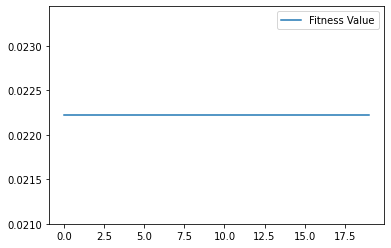

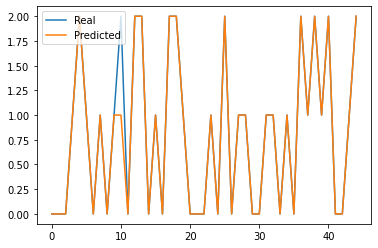



mean squared error: 	 0.022222 


prediction average: 	 0.800000


prediction median:	 1.000000


In [208]:
pso(200,20,4,1)

In [209]:
dtree=tree.DecisionTreeClassifier(max_depth=26.644153256799747,
                       max_features=7.211324262993783e-06,
                       min_impurity_decrease=0.06804809468247475,
                       min_samples_leaf=0.24211729001618007)
dtree.fit(x_train,y_train)
pred=dtree.predict(x_test)
pred

array([0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0,
       0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 2, 0, 0, 1,
       2])

In [210]:
p_acc_score=metrics.accuracy_score(y_test,pred)
print("Accuracy score : ",p_acc_score*100)

Accuracy score :  95.55555555555556


In [211]:
p_c_f=metrics.confusion_matrix(y_test,pred)
print(p_c_f)

[[19  0  0]
 [ 0 15  0]
 [ 0  2  9]]


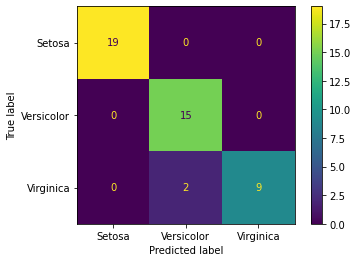

In [212]:
p_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = p_c_f, display_labels = ['Setosa', 'Versicolor',
                                                                                      'Virginica'])
p_cm_display.plot()